In [16]:
import pandas as pd  
import plotly.express as px
import matplotlib.pyplot as plt
import random

import numpy as np

from wordcloud import WordCloud

In [2]:
df = pd.read_csv(r'/kaggle/input/fake-news-classification/WELFake_Dataset.csv')

## How the dataset looks like : 

In [3]:
df.head(3)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1


## Number of columns and rows : (rows,column)

In [4]:
df.shape

(72134, 4)

Info about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


pie chart about the proportion of the data

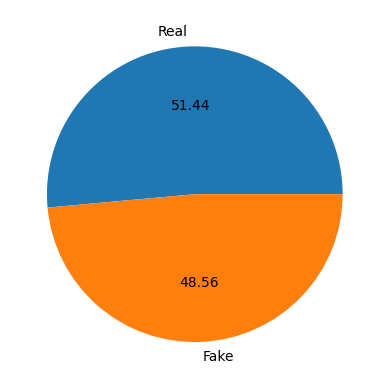

In [6]:
plt.pie(df['label'].value_counts(), labels=['Real', 'Fake'], autopct = "%0.2f")
plt.show()

bar chart on the data fake and real news data

<AxesSubplot: >

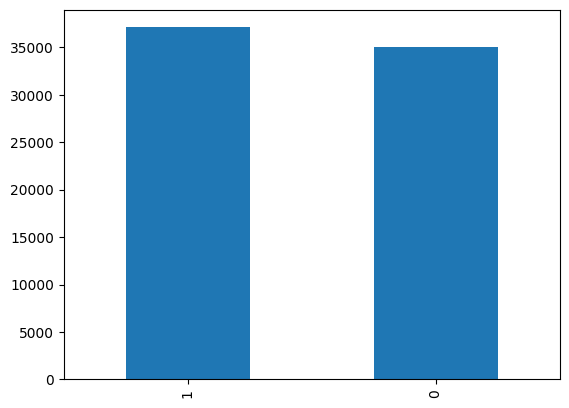

In [7]:
df['label'].value_counts().plot(kind = 'bar') 

# 0 means fake and 1 means real 

In [9]:
wc = WordCloud(width = 1000, height = 1000, min_font_size=10, background_color = 'black')

# Word cloud of title 


fake news 

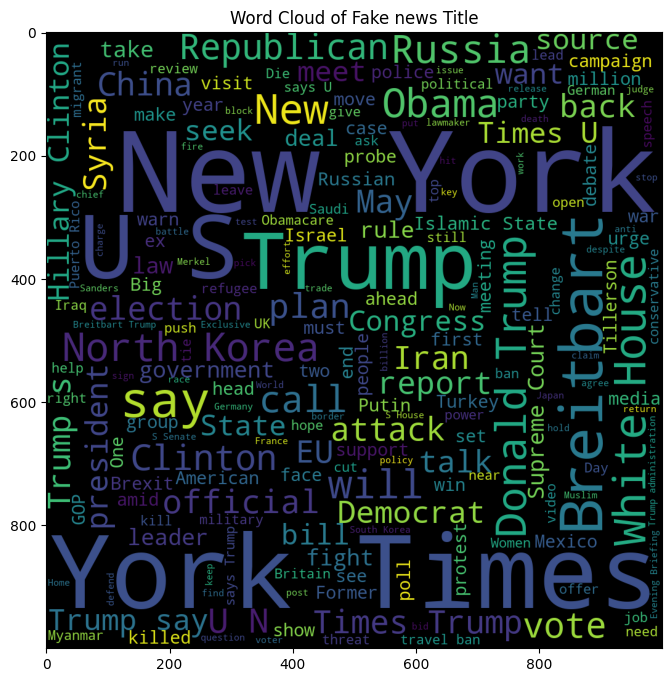

In [63]:
real_news_title =wc.generate(df[df['label']==0]['title'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.title('Word Cloud of Fake news Title')

plt.imshow(real_news_title)

real news 

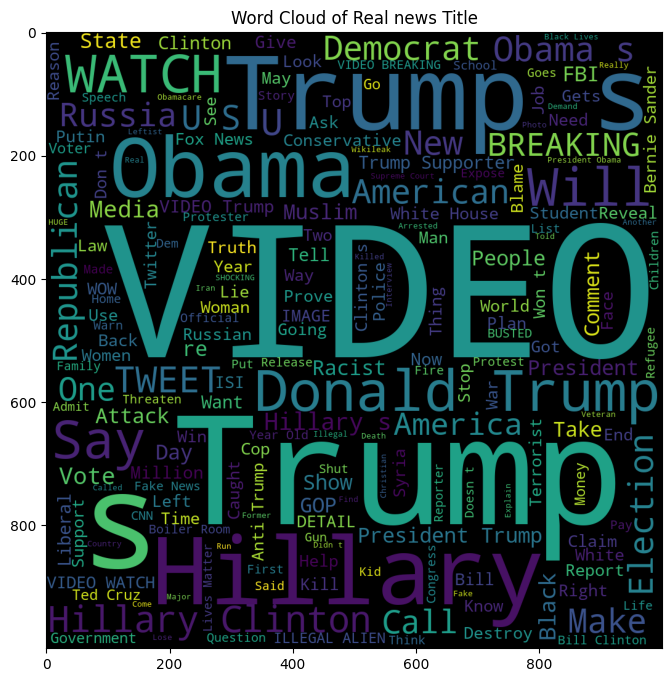

In [64]:
real_news_title =wc.generate(df[df['label']==1]['title'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.title('Word Cloud of Real news Title')
plt.imshow(real_news_title)

# Word cloud text

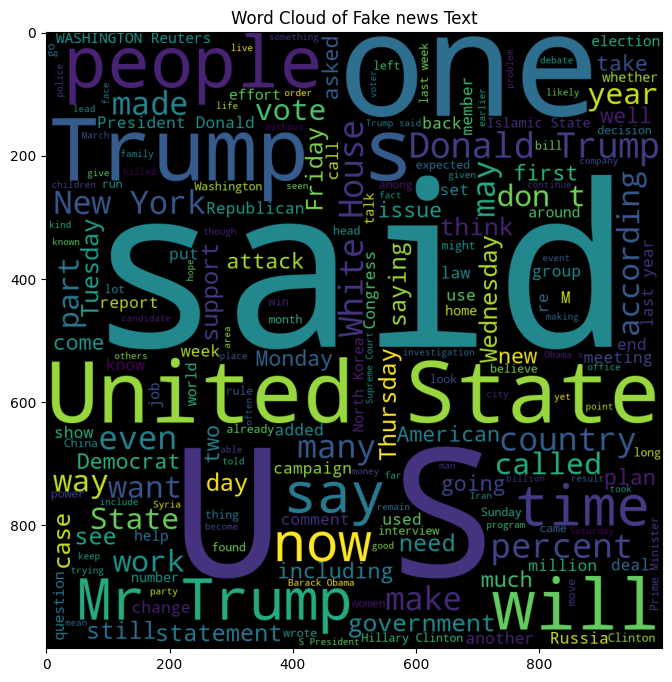

In [65]:
fake_news_text = wc.generate(df[df['label']==0]['text'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.title('Word Cloud of Fake news Text')
plt.imshow(fake_news_text)

word colud real news text

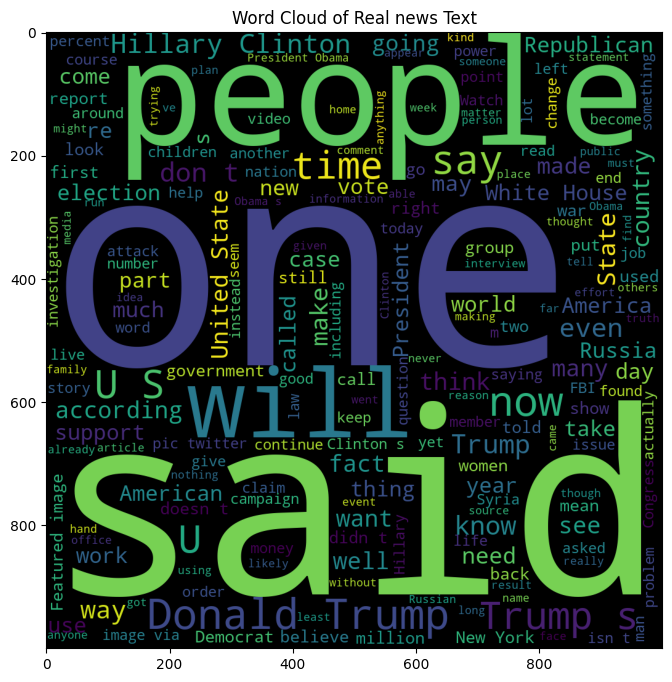

In [66]:
fake_news_text = wc.generate(df[df['label']==1]['text'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.title('Word Cloud of Real news Text')
plt.imshow(fake_news_text)

# Top 20 word in fake news dataset

In [59]:
df = pd.read_csv('/kaggle/input/fake-news-classification/WELFake_Dataset.csv')
df = df.dropna()

/tmp/ipykernel_34/417035353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df.dropna(subset=['text'], inplace=True)


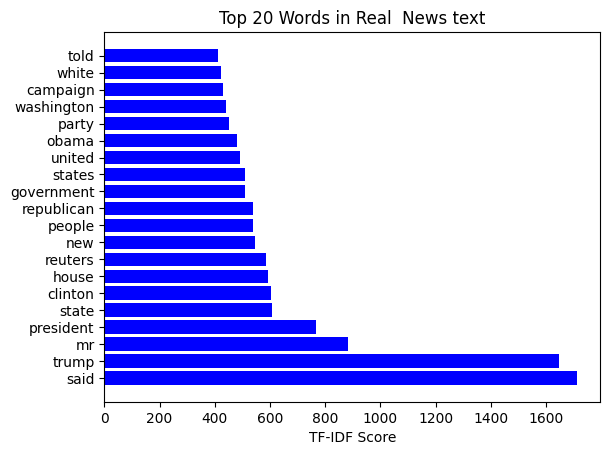

In [42]:
# Filter only the fake news articles
fake_df = df[df['label'] == 0]

# Drop rows with missing values in the 'text' column
fake_df.dropna(subset=['text'], inplace=True)

# Get the text data from fake news articles
texts = fake_df['text'].tolist()

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(texts)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate the TF-IDF scores for each word
word_scores = zip(feature_names, np.asarray(tfidf_matrix.sum(axis=0)).ravel())

# Sort the words by their TF-IDF scores in descending order
sorted_word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)

# Extract the top 20 words and scores
top_20_words = [word for word, _ in sorted_word_scores[:20]]
top_20_scores = [score for _, score in sorted_word_scores[:20]]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the bar chart
ax.barh(range(len(top_20_words)), top_20_scores, align='center', color='blue')

# Set the y-axis labels
ax.set_yticks(range(len(top_20_words)))
ax.set_yticklabels(top_20_words)

# Set the x-axis label
ax.set_xlabel('TF-IDF Score')

# Set the title
ax.set_title('Top 20 Words in Real  News text')

# Show the plot
plt.show()

/tmp/ipykernel_34/1007149398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df.dropna(subset=['text'], inplace=True)


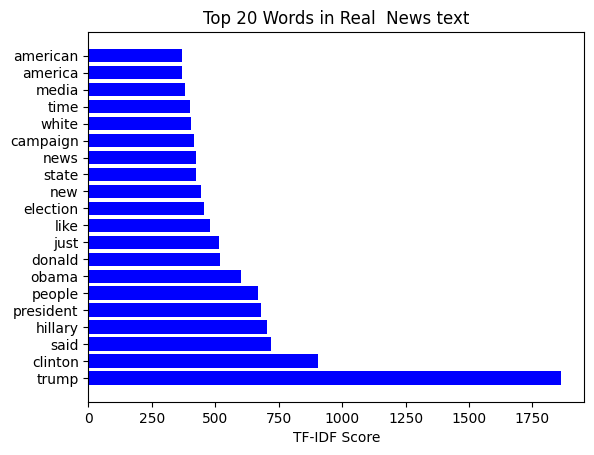

In [43]:
# Filter only the fake news articles
fake_df = df[df['label'] == 1]

# Drop rows with missing values in the 'text' column
fake_df.dropna(subset=['text'], inplace=True)

# Get the text data from fake news articles
texts = fake_df['text'].tolist()

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(texts)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate the TF-IDF scores for each word
word_scores = zip(feature_names, np.asarray(tfidf_matrix.sum(axis=0)).ravel())

# Sort the words by their TF-IDF scores in descending order
sorted_word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)

# Extract the top 20 words and scores
top_20_words = [word for word, _ in sorted_word_scores[:20]]
top_20_scores = [score for _, score in sorted_word_scores[:20]]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the bar chart
ax.barh(range(len(top_20_words)), top_20_scores, align='center', color='blue')

# Set the y-axis labels
ax.set_yticks(range(len(top_20_words)))
ax.set_yticklabels(top_20_words)

# Set the x-axis label
ax.set_xlabel('TF-IDF Score')

# Set the title
ax.set_title('Top 20 Words in Real  News text')

# Show the plot
plt.show()

# After pre processing 

In [67]:
df = pd.read_csv('/kaggle/input/cleaned/cleaned_welfake.csv')

top 20 words in real news text

/tmp/ipykernel_34/586570649.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df.dropna(subset=['total_content'], inplace=True)


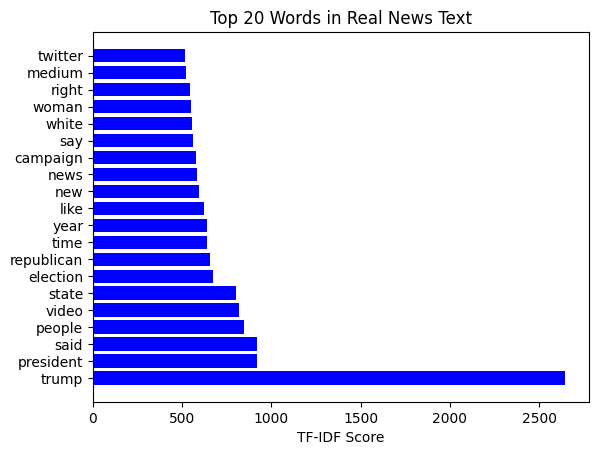

In [45]:
# Filter only the fake news articles
fake_df = df[df['label'] == 1]

# Drop rows with missing values in the 'text' column
fake_df.dropna(subset=['total_content'], inplace=True)

# Get the text data from fake news articles
texts = fake_df['total_content'].tolist()

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(texts)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate the TF-IDF scores for each word
word_scores = zip(feature_names, np.asarray(tfidf_matrix.sum(axis=0)).ravel())

# Sort the words by their TF-IDF scores in descending order
sorted_word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)

# Extract the top 20 words and scores
top_20_words = [word for word, _ in sorted_word_scores[:20]]
top_20_scores = [score for _, score in sorted_word_scores[:20]]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the bar chart
ax.barh(range(len(top_20_words)), top_20_scores, align='center', color='blue')

# Set the y-axis labels
ax.set_yticks(range(len(top_20_words)))
ax.set_yticklabels(top_20_words)

# Set the x-axis label
ax.set_xlabel('TF-IDF Score')

# Set the title
ax.set_title('Top 20 Words in Real News Text')

# Show the plot
plt.show()

top 20 words in fake news text 

/tmp/ipykernel_34/2813359484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df.dropna(subset=['total_content'], inplace=True)


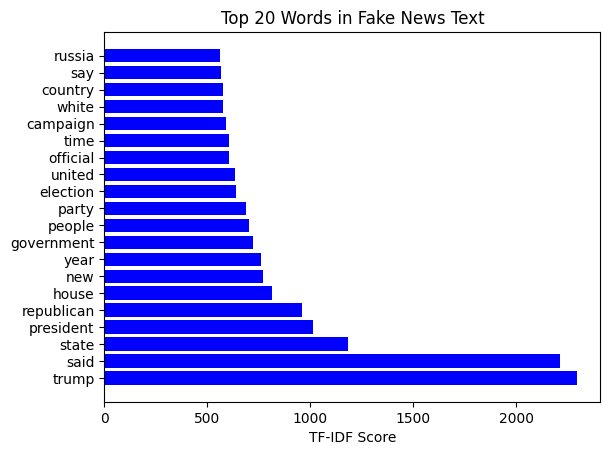

In [46]:
# Filter only the fake news articles
fake_df = df[df['label'] == 0]

# Drop rows with missing values in the 'text' column
fake_df.dropna(subset=['total_content'], inplace=True)

# Get the text data from fake news articles
texts = fake_df['total_content'].tolist()

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(texts)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate the TF-IDF scores for each word
word_scores = zip(feature_names, np.asarray(tfidf_matrix.sum(axis=0)).ravel())

# Sort the words by their TF-IDF scores in descending order
sorted_word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)

# Extract the top 20 words and scores
top_20_words = [word for word, _ in sorted_word_scores[:20]]
top_20_scores = [score for _, score in sorted_word_scores[:20]]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the bar chart
ax.barh(range(len(top_20_words)), top_20_scores, align='center', color='blue')

# Set the y-axis labels
ax.set_yticks(range(len(top_20_words)))
ax.set_yticklabels(top_20_words)

# Set the x-axis label
ax.set_xlabel('TF-IDF Score')

# Set the title
ax.set_title('Top 20 Words in Fake News Text')

# Show the plot
plt.show()

# Top trigram

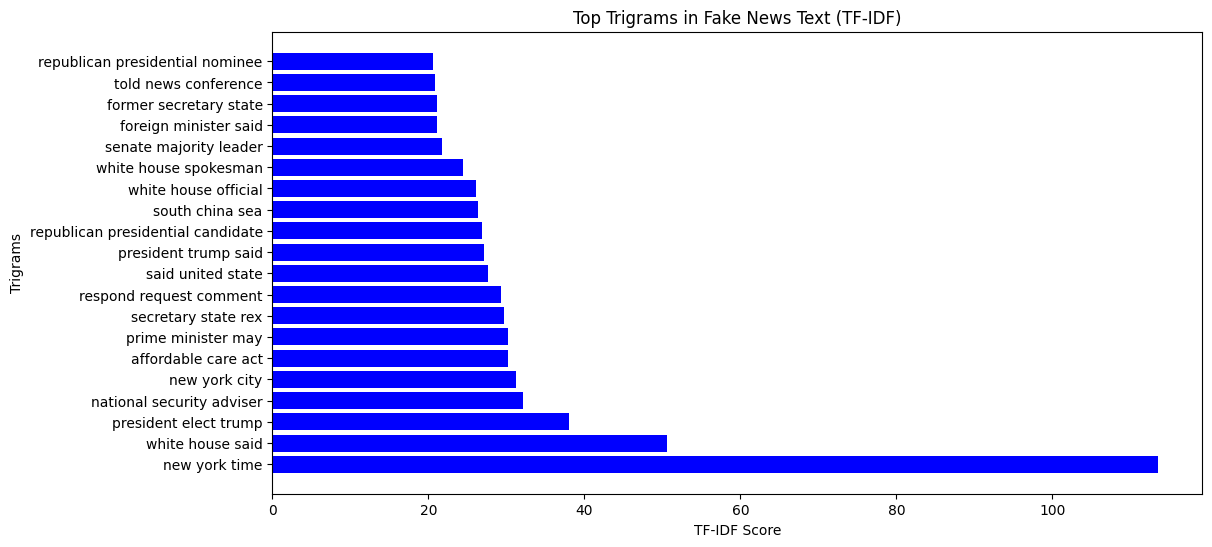

In [53]:
# Filter the dataset for fake news articles
fake_df = df[df['label'] == 0]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(3, 3))

# Fit and transform the fake news text data
X = vectorizer.fit_transform(fake_df['total_content'])

# Get the feature names (trigrams)
feature_names = vectorizer.get_feature_names_out()

# Calculate the TF-IDF scores for each trigram
tfidf_scores = X.sum(axis=0)

# Create a DataFrame to store the trigram scores
df_tfidf_scores = pd.DataFrame(tfidf_scores.T, index=feature_names, columns=['TF-IDF Score'])

# Sort the trigrams by their TF-IDF scores in descending order
top_trigrams = df_tfidf_scores.sort_values(by='TF-IDF Score', ascending=False).head(20)

# Visualize the top trigrams
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_trigrams.index)), top_trigrams['TF-IDF Score'], align='center', color='blue')
plt.yticks(range(len(top_trigrams.index)), top_trigrams.index)
plt.title('Top Trigrams in Fake News Text (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Trigrams')
plt.show()

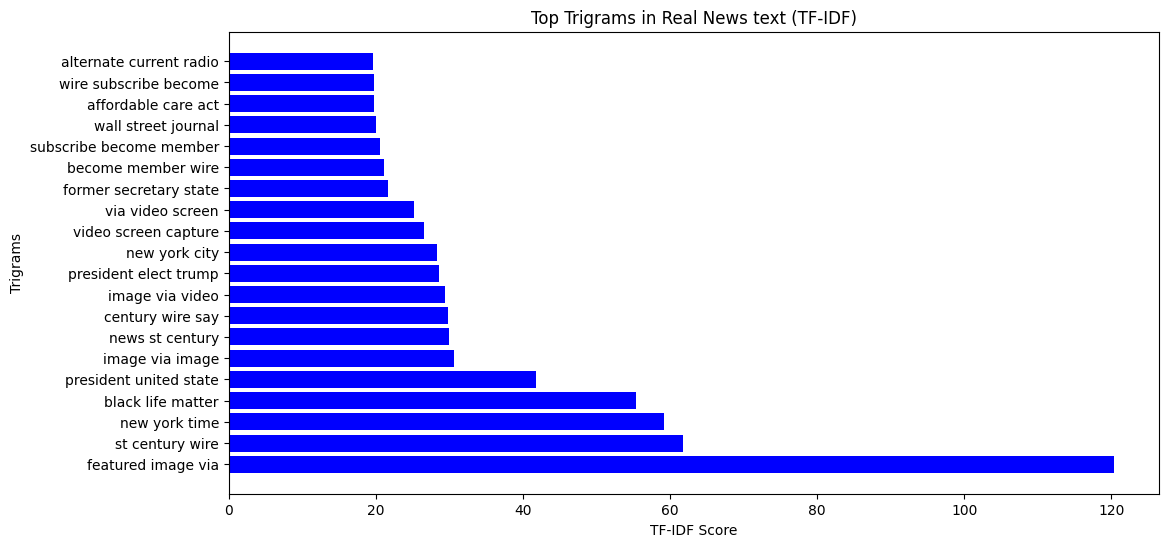

In [55]:
# Handle missing values in the text column
df['total_content'].fillna('', inplace=True)

# Filter the dataset for fake news articles
fake_df = df[df['label'] == 1]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(3, 3))

# Fit and transform the fake news text data
X = vectorizer.fit_transform(fake_df['total_content'])

# Get the feature names (trigrams)
feature_names = vectorizer.get_feature_names_out()

# Calculate the TF-IDF scores for each trigram
tfidf_scores = X.sum(axis=0)

# Create a DataFrame to store the trigram scores
df_tfidf_scores = pd.DataFrame(tfidf_scores.T, index=feature_names, columns=['TF-IDF Score'])

# Sort the trigrams by their TF-IDF scores in descending order
top_trigrams = df_tfidf_scores.sort_values(by='TF-IDF Score', ascending=False).head(20)

# Visualize the top trigrams
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_trigrams.index)), top_trigrams['TF-IDF Score'], align='center', color='blue')
plt.yticks(range(len(top_trigrams.index)), top_trigrams.index)
plt.title('Top Trigrams in Real News text (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Trigrams')
plt.show()

# Top 20 bigram

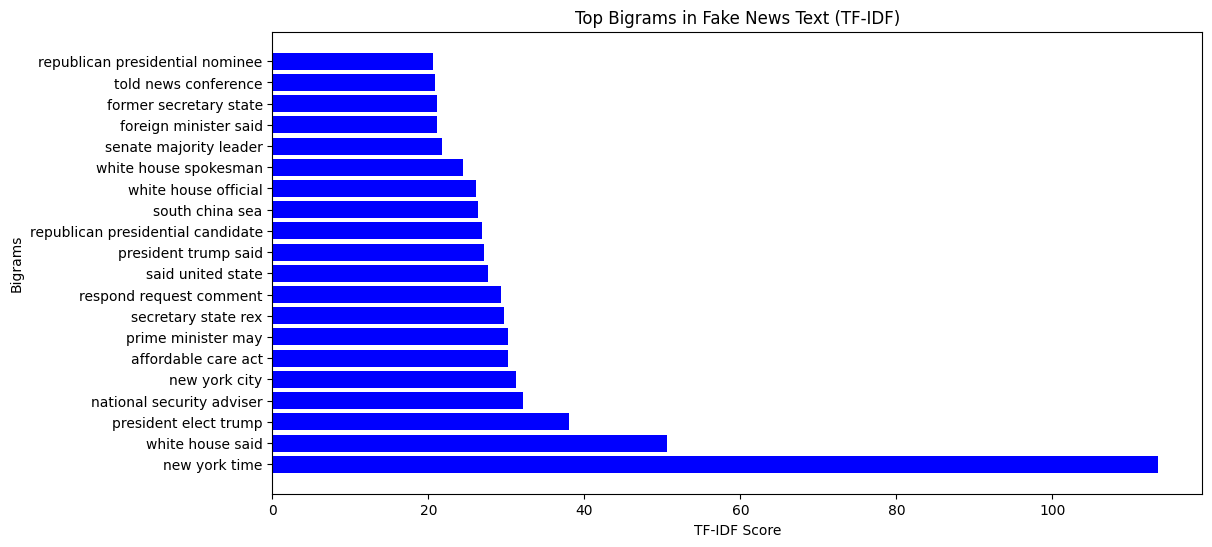

In [52]:
# Filter the dataset for fake news articles
fake_df = df[df['label'] == 0]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(3, 3))

# Fit and transform the fake news text data
X = vectorizer.fit_transform(fake_df['total_content'])

# Get the feature names (trigrams)
feature_names = vectorizer.get_feature_names_out()

# Calculate the TF-IDF scores for each trigram
tfidf_scores = X.sum(axis=0)

# Create a DataFrame to store the trigram scores
df_tfidf_scores = pd.DataFrame(tfidf_scores.T, index=feature_names, columns=['TF-IDF Score'])

# Sort the trigrams by their TF-IDF scores in descending order
top_trigrams = df_tfidf_scores.sort_values(by='TF-IDF Score', ascending=False).head(20)

# Visualize the top trigrams
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_trigrams.index)), top_trigrams['TF-IDF Score'], align='center', color='blue')
plt.yticks(range(len(top_trigrams.index)), top_trigrams.index)
plt.title('Top Bigrams in Fake News Text (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Bigrams')
plt.show()

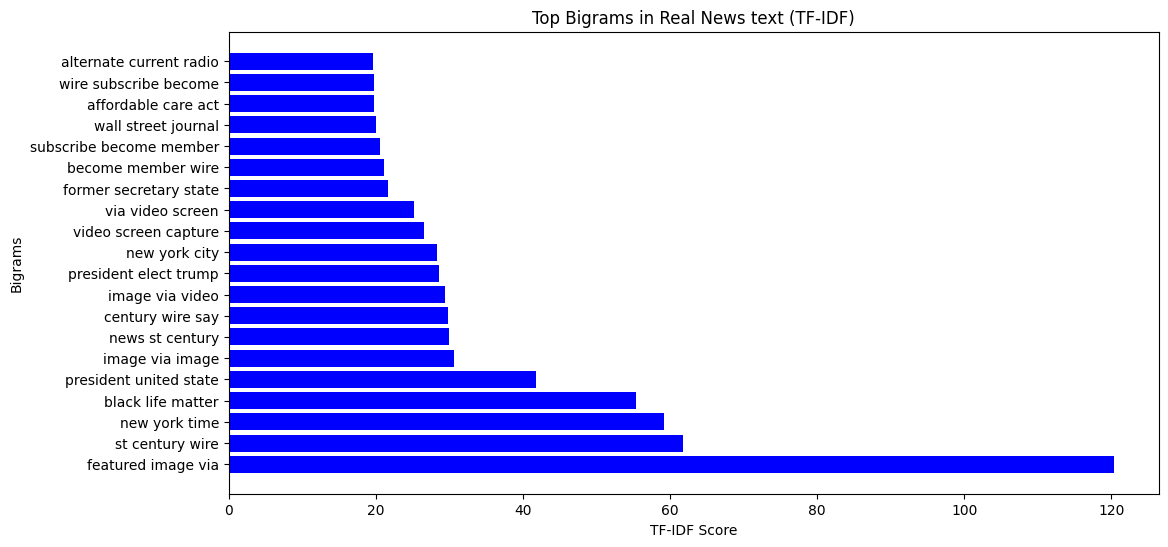

In [56]:
# Handle missing values in the text column
df['total_content'].fillna('', inplace=True)

# Filter the dataset for fake news articles
fake_df = df[df['label'] == 1]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(3, 3))

# Fit and transform the fake news text data
X = vectorizer.fit_transform(fake_df['total_content'])

# Get the feature names (trigrams)
feature_names = vectorizer.get_feature_names_out()

# Calculate the TF-IDF scores for each trigram
tfidf_scores = X.sum(axis=0)

# Create a DataFrame to store the trigram scores
df_tfidf_scores = pd.DataFrame(tfidf_scores.T, index=feature_names, columns=['TF-IDF Score'])

# Sort the trigrams by their TF-IDF scores in descending order
top_trigrams = df_tfidf_scores.sort_values(by='TF-IDF Score', ascending=False).head(20)

# Visualize the top trigrams
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_trigrams.index)), top_trigrams['TF-IDF Score'], align='center', color='blue')
plt.yticks(range(len(top_trigrams.index)), top_trigrams.index)
plt.title('Top Bigrams in Real News text (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Bigrams')
plt.show()

# Word Cloud After Pre processing The data 

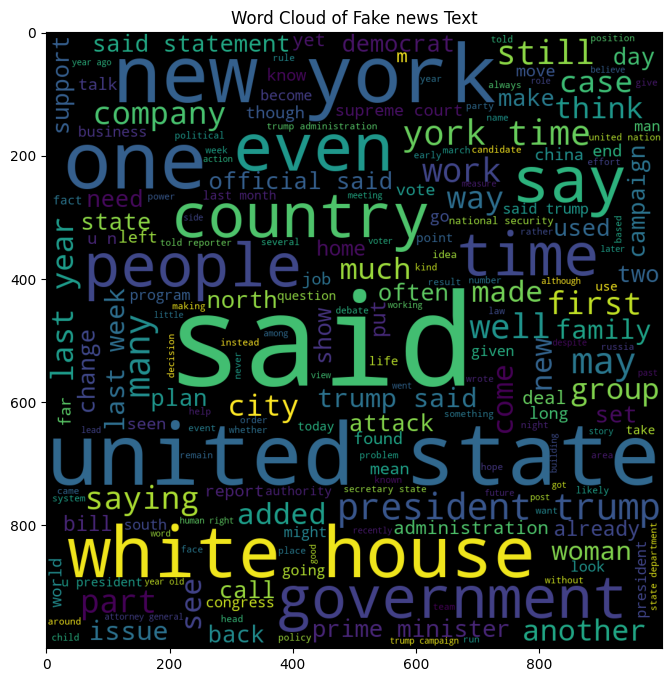

In [69]:
fake_news_text = wc.generate(df[df['label']==0]['total_content'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.title('Word Cloud of Fake news Text')
plt.imshow(fake_news_text)

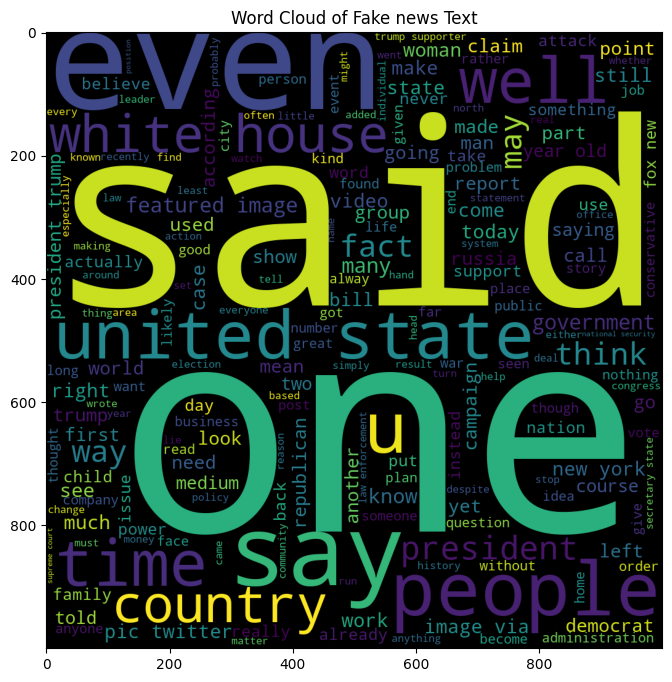

In [70]:
fake_news_text = wc.generate(df[df['label']==1]['total_content'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.title('Word Cloud of Fake news Text')
plt.imshow(fake_news_text)